This project demonstrates portfolio optimization techniques using Python. It includes:

- Monte Carlo simulation to find the portfolio with the maximum Sharpe ratio.

- Mean-variance optimization using a utility function incorporating risk aversion.

- Real stock data analysis for tickers: NVDA, MSFT, TSLA, and META.

- Allocation recommendations based on user-defined risk preference and investment amount.

In [35]:
# Import dependencies

import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

from scipy import stats


# Construction of an Optimal Portfolio:
## Data Driven Porfolio Allocation - A sharpe Ratio Maximizatin Approach.

In [36]:
start = datetime.datetime(2022,5,1)
end = datetime.datetime(2025,5,1)
tickers = ["NVDA", "MSFT", "TSLA", "META"]

rf = 0.003

data_1 = yf.download(tickers,
                     start=start,
                     end=end)

C:\Users\marti\AppData\Local\Temp\ipykernel_31812\346577937.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download(tickers,
[*********************100%***********************]  4 of 4 completed


In [37]:
data_1

Price            Close                                            High  \
Ticker            META        MSFT        NVDA        TSLA        META   
Date                                                                     
2022-05-02  209.978058  276.787933   19.500744  300.980011  210.723966   
2022-05-03  210.873154  274.170563   19.569624  303.083344  213.727490   
2022-05-04  222.191055  282.149170   20.300419  317.540009  223.076199   
2022-05-05  207.143600  269.860260   18.812881  291.093323  218.968727   
2022-05-06  202.658203  267.310974   18.644157  288.549988  208.237595   
...                ...         ...         ...         ...         ...   
2025-04-24  532.740112  386.590271  106.422607  259.510010  533.489536   
2025-04-25  546.849243  391.131958  111.002296  284.950012  549.437218   
2025-04-28  549.317322  390.443207  108.722450  285.880005  558.060594   
2025-04-29  554.013733  393.317932  109.012428  292.029999  556.142100   
2025-04-30  548.577881  394.535706  108.912437  282.160004  548.677780   

Price                                                  Low              \
Ticker            MSFT        NVDA        TSLA        META        MSFT   
Date                                                                     
2022-05-02  277.245242   19.541675  302.119995  199.893383  268.760723   
2022-05-03  276.457107   19.792257  308.026672  206.954648  272.584576   
2022-05-04  283.024860   20.366310  318.500000  205.830811  269.256983   
2022-05-05  278.617218   19.892096  315.200012  205.035172  266.931535   
2022-05-06  271.708902   19.479775  296.000000  199.923208  263.944389   
...                ...         ...         ...         ...         ...   
2025-04-24  387.738188  106.532600  259.540009  517.102120  374.502477   
2025-04-25  391.441388  111.912229  286.850006  535.837697  383.895243   
2025-04-28  392.020298  110.362336  294.859985  540.174393  385.931501   
2025-04-29  394.375987  110.192347  293.320007  543.701660  389.664635   
2025-04-30  395.933134  108.912437  284.450012  529.092874  383.735526   

Price                                     Open                          \
Ticker            NVDA        TSLA        META        MSFT        NVDA   
Date                                                                     
2022-05-02   18.360630  282.676666  200.072394  270.210477   18.510381   
2022-05-03   19.101399  296.196655  209.301772  276.291685   19.367958   
2022-05-04   18.720033  295.093323  209.500665  274.958721   19.890098   
2022-05-05   18.469450  285.899994  217.546536  277.829094   19.834193   
2022-05-06   17.960289  281.036682  206.208717  267.388801   18.705057   
...                ...         ...         ...         ...         ...   
2025-04-24  103.102838  249.199997  518.331155  375.011552  103.472815   
2025-04-25  105.722664  259.630005  546.379573  386.290839  106.842582   
2025-04-28  106.012632  272.420013  555.212810  391.241729  109.682383   
2025-04-29  107.432544  279.470001  545.580219  390.582932  107.662524   
2025-04-30  104.072777  270.779999  537.986055  389.584773  104.462749   

Price                     Volume                                  
Ticker            TSLA      META      MSFT       NVDA       TSLA  
Date                                                              
2022-05-02  286.923340  49915300  35151100  572049000   75781500  
2022-05-03  301.059998  41556300  25978600  475751000   63709500  
2022-05-04  301.313324  41375900  33599300  648855000   81643800  
2022-05-05  313.006653  41129200  43260400  626331000   92519100  
2022-05-06  295.666656  34747200  37780300  633297000   72903000  
...                ...       ...       ...        ...        ...  
2025-04-24  250.500000  13910000  22232300  220815000   94464200  
2025-04-25  261.690002  17098900  18973200  251064700  167560700  
2025-04-28  288.980011  15179000  16579400  207708500  151731800  
2025-04-29  285.500000  11835000  14974000  170444300  108906600  
2025-04-30  279.89

In [38]:
## Flatten column names
data_1.columns = [f"{level1}_{level2}" for level1, level2 in data_1.columns]

In [39]:
data_1.head(5)

,Close_META,Close_MSFT,Close_NVDA,Close_TSLA,High_META,High_MSFT,High_NVDA,High_TSLA,Low_META,Low_MSFT,Low_NVDA,Low_TSLA,Open_META,Open_MSFT,Open_NVDA,Open_TSLA,Volume_META,Volume_MSFT,Volume_NVDA,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,,,
2022-05-02,209.978058,276.787933,19.500744,300.980011,210.723966,277.245242,19.541675,302.119995,199.893383,268.760723,18.360630,282.676666,200.072394,270.210477,18.510381,286.923340,49915300,35151100,572049000,75781500
2022-05-03,210.873154,274.170563,19.569624,303.083344,213.727490,276.457107,19.792257,308.026672,206.954648,272.584576,19.101399,296.196655,209.301772,276.291685,19.367958,301.059998,41556300,25978600,475751000,63709500
2022-05-04,222.191055,282.149170,20.300419,317.540009,223.076199,283.024860,20.366310,318.500000,205.830811,269.256983,18.720033,295.093323,209.500665,274.958721,19.890098,301.313324,41375900,33599300,648855000,81643800
2022-05-05,207.143600,269.860260,18.812881,291.093323,218.968727,278.617218,19.892096,315.200012,205.035172,266.931535,18.469450,285.899994,217.546536,277.829094,19.834193,313.006653,41129200,43260400,626331000,92519100
2022-05-06,202.658203,267.310974,18.644157,288.549988,208.237595,271.708902,19.479775,296.000000,199.923208,263.944389,17.960289,281.036682,206.208717,267.388801,18.705057,295.666656,34747200,37780300,633297000,72903000


In [40]:
# Different ways of doing pct_change

"""
data_1["ret_META"] = data_1["Close_META"].diff()/data_1["Close_META"].shift(1)

data_1["ret_MSFT"] = data_1["Close_MSFT"].diff()/data_1["Close_MSFT"].shift(1)

data_1["ret_NVDA"] = data_1["Close_NVDA"].diff()/data_1["Close_NVDA"].shift(1)

data_1["ret_TSLA"] = data_1["Close_TSLA"].diff()/data_1["Close_TSLA"].shift(1)
"""
data_1["ret_META"] = data_1["Close_META"].pct_change()

data_1["ret_MSFT"] = data_1["Close_MSFT"].pct_change()

data_1["ret_NVDA"] = data_1["Close_NVDA"].pct_change()

data_1["ret_TSLA"] = data_1["Close_TSLA"].pct_change()

data_1 = data_1.dropna()
data_1.reset_index()

,Date,Close_META,Close_MSFT,Close_NVDA,Close_TSLA,High_META,High_MSFT,High_NVDA,High_TSLA,Low_META,...,Open_NVDA,Open_TSLA,Volume_META,Volume_MSFT,Volume_NVDA,Volume_TSLA,ret_META,ret_MSFT,ret_NVDA,ret_TSLA
0,2022-05-03,210.873154,274.170563,19.569624,303.083344,213.727490,276.457107,19.792257,308.026672,206.954648,...,19.367958,301.059998,41556300,25978600,475751000,63709500,0.004263,-0.009456,0.003532,0.006988
1,2022-05-04,222.191055,282.149170,20.300419,317.540009,223.076199,283.024860,20.366310,318.500000,205.830811,...,19.890098,301.313324,41375900,33599300,648855000,81643800,0.053672,0.029101,0.037343,0.047699
2,2022-05-05,207.143600,269.860260,18.812881,291.093323,218.968727,278.617218,19.892096,315.200012,205.035172,...,19.834193,313.006653,41129200,43260400,626331000,92519100,-0.067723,-0.043555,-0.073276,-0.083286
3,2022-05-06,202.658203,267.310974,18.644157,288.549988,208.237595,271.708902,19.479775,296.000000,199.923208,...,18.705057,295.666656,34747200,37780300,633297000,72903000,-0.021654,-0.009447,-0.008969,-0.008737
4,2022-05-09,195.139465,257.435059,16.922010,262.369995,201.464765,265.004960,18.224854,281.876678,194.512898,...,18.004220,278.816681,36303200,47726000,644455000,90810300,-0.037101,-0.036945,-0.092369,-0.090729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2025-04-24,532.740112,386.590271,106.422607,259.510010,533.489536,387.738188,106.532600,259.540009,517.102120,...,103.472815,250.500000,13910000,22232300,220815000,94464200,0.024756,0.034483,0.036218,0.034976
747,2025-04-25,546.849243,391.131958,111.002296,284.950012,549.437218,391.441388,111.912229,286.850006,535.837697,...,106.842582,261.690002,17098900,18973200,251064700,167560700,0.026484,0.011748,0.043033,0.098031
748,2025-04-28,549.317322,390.443207,108.722450,285.880005,558.060594,392.020298,110.362336,294.859985,540.174393,...,109.682383,288.980011,15179000,16579400,207708500,151731800,0.004513,-0.001761,-0.020539,0.003264
749,2025-04-29,554.013733,393.317932,109.012428,292.029999,556.142100,394.375987,110.192347,293.320007,543.701660,...,107.662524,285.500000,11835000,14974000,170444300,108906600,0.008550,0.007363,0.002667,0.021513


In [41]:
returns = data_1[["ret_META", "ret_MSFT", "ret_NVDA", "ret_TSLA"]]

cov_matrix = returns.cov()

num_portfolios = 70000 # Starting monte carlo simulation

In [42]:
weights_portfolios = np.zeros((num_portfolios, 4))
returns_portfolios = np.zeros(num_portfolios)
volatility_portfolios = np.zeros(num_portfolios)
sharpe_ratio_portfolios = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(4)
    weights /= np.sum(weights)

    returns_portfolios[i] = np.sum(returns.mean() * weights) * 252 # of days market is open - expected return
    volatility_portfolios[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio_portfolios[i] = (returns_portfolios[i] - rf) / volatility_portfolios[i]
    weights_portfolios[i, :] = weights

max_sharpe_idx = np.argmax(sharpe_ratio_portfolios)
max_sharpe_returns = returns_portfolios[max_sharpe_idx]
max_sharpe_volatility = volatility_portfolios[max_sharpe_idx]
max_sharpe_weights = weights_portfolios[max_sharpe_idx]    

In [43]:
print("Optimal Portfolio")
print("-----------------")
print("Expected Annual Return:", round(max_sharpe_returns, 4))
print("Annual Volatility     :", round(max_sharpe_volatility, 4))
print("Sharpe Ratio          :", round(sharpe_ratio_portfolios[max_sharpe_idx], 4))
print("Asset Weights:")
for i in range(len(tickers)):
    print(f"{tickers[i]:<6}: {round(max_sharpe_weights[i], 4)}")

Optimal Portfolio
-----------------
Expected Annual Return: 0.6515
Annual Volatility     : 0.4855
Sharpe Ratio          : 1.3357
Asset Weights:
NVDA  : 0.2455
MSFT  : 0.0053
TSLA  : 0.7438
META  : 0.0053


Model is heavily concentrated in TSLA and NVDA, which are high growth and high volatility, meaning it explains both a high return and a high risk.

This portfolio is ideal to someone who has a high risk tolerance.

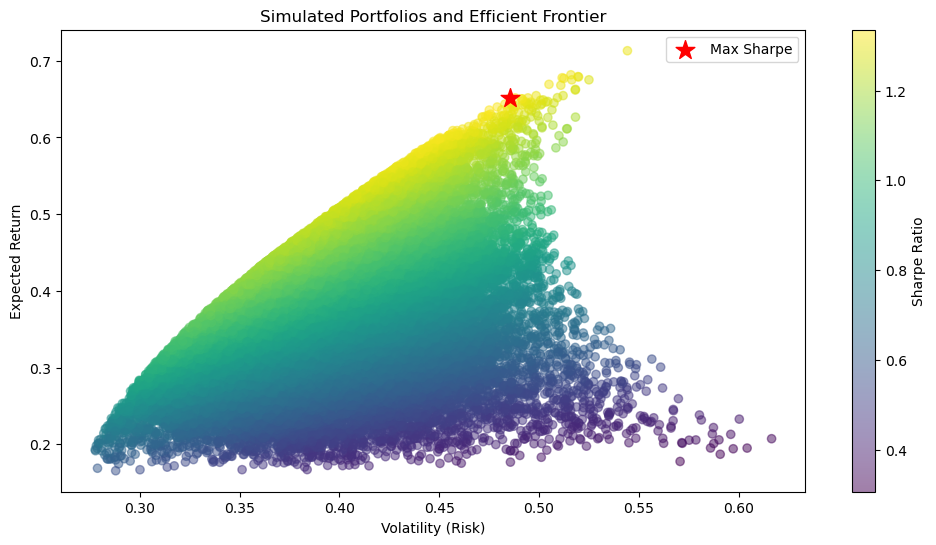

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(volatility_portfolios, returns_portfolios, c=sharpe_ratio_portfolios, cmap="viridis", alpha=0.5)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(max_sharpe_volatility, max_sharpe_returns, c="red", marker="*", s=200, label="Max Sharpe")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Simulated Portfolios and Efficient Frontier")
plt.legend()
plt.show()

# This next part we will Incorporate risk preference into the weight calculations.

## Portfolio Optimization using Mean-Variance Utility and Risk Aversion

In [45]:
from scipy.optimize import minimize

tickers = ["NVDA", "MSFT", "TSLA", "META"]
start = "2022-05-01"
end = "2025-05-01"
A = 10 # risk aversion
"""
Risk Aversion - adjust: higher more weight to stable/low risk assets., lower = more weight to high risk/ high return assets.
# a=0 ignores risk, 1 moderate, 5-10 high risk aversion, very large is extremem risk aversion (almost no risk tolerated)
"""

total_investment = 15000


In [46]:
data = yf.download(tickers, start=start, end=end)

data.columns = ["_".join(col).strip() for col in data.columns.values] # flatten

data.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_31812\1757564376.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)
[*********************100%***********************]  4 of 4 completed


,Close_META,Close_MSFT,Close_NVDA,Close_TSLA,High_META,High_MSFT,High_NVDA,High_TSLA,Low_META,Low_MSFT,Low_NVDA,Low_TSLA,Open_META,Open_MSFT,Open_NVDA,Open_TSLA,Volume_META,Volume_MSFT,Volume_NVDA,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,,,
2022-05-02,209.978058,276.787933,19.500744,300.980011,210.723966,277.245242,19.541675,302.119995,199.893383,268.760723,18.360630,282.676666,200.072394,270.210477,18.510381,286.923340,49915300,35151100,572049000,75781500
2022-05-03,210.873154,274.170563,19.569624,303.083344,213.727490,276.457107,19.792257,308.026672,206.954648,272.584576,19.101399,296.196655,209.301772,276.291685,19.367958,301.059998,41556300,25978600,475751000,63709500
2022-05-04,222.191055,282.149170,20.300419,317.540009,223.076199,283.024860,20.366310,318.500000,205.830811,269.256983,18.720033,295.093323,209.500665,274.958721,19.890098,301.313324,41375900,33599300,648855000,81643800
2022-05-05,207.143600,269.860260,18.812881,291.093323,218.968727,278.617218,19.892096,315.200012,205.035172,266.931535,18.469450,285.899994,217.546536,277.829094,19.834193,313.006653,41129200,43260400,626331000,92519100
2022-05-06,202.658203,267.310974,18.644157,288.549988,208.237595,271.708902,19.479775,296.000000,199.923208,263.944389,17.960289,281.036682,206.208717,267.388801,18.705057,295.666656,34747200,37780300,633297000,72903000


In [47]:
for ticker in tickers:
    data[f"ret_{ticker}"] = data[f"Close_{ticker}"].pct_change() # Calculate daily returns

data = data.dropna()

data.head()

,Close_META,Close_MSFT,Close_NVDA,Close_TSLA,High_META,High_MSFT,High_NVDA,High_TSLA,Low_META,Low_MSFT,...,Open_NVDA,Open_TSLA,Volume_META,Volume_MSFT,Volume_NVDA,Volume_TSLA,ret_NVDA,ret_MSFT,ret_TSLA,ret_META
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,210.873154,274.170563,19.569624,303.083344,213.727490,276.457107,19.792257,308.026672,206.954648,272.584576,...,19.367958,301.059998,41556300,25978600,475751000,63709500,0.003532,-0.009456,0.006988,0.004263
2022-05-04,222.191055,282.149170,20.300419,317.540009,223.076199,283.024860,20.366310,318.500000,205.830811,269.256983,...,19.890098,301.313324,41375900,33599300,648855000,81643800,0.037343,0.029101,0.047699,0.053672
2022-05-05,207.143600,269.860260,18.812881,291.093323,218.968727,278.617218,19.892096,315.200012,205.035172,266.931535,...,19.834193,313.006653,41129200,43260400,626331000,92519100,-0.073276,-0.043555,-0.083286,-0.067723
2022-05-06,202.658203,267.310974,18.644157,288.549988,208.237595,271.708902,19.479775,296.000000,199.923208,263.944389,...,18.705057,295.666656,34747200,37780300,633297000,72903000,-0.008969,-0.009447,-0.008737,-0.021654
2022-05-09,195.139465,257.435059,16.922010,262.369995,201.464765,265.004960,18.224854,281.876678,194.512898,256.209105,...,18.004220,278.816681,36303200,47726000,644455000,90810300,-0.092369,-0.036945,-0.090729,-0.037101


In [62]:
returns = data[[f"ret_{ticker}" for ticker in tickers]]
mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Mean returns:\n", mean_returns)
print()
print("Covariance Matrix:\n", cov_matrix)

Mean returns:
 ret_NVDA    0.002910
ret_MSFT    0.000618
ret_TSLA    0.000711
ret_META    0.001686
dtype: float64

Covariance Matrix:
           ret_NVDA  ret_MSFT  ret_TSLA  ret_META
ret_NVDA  0.001250  0.000381  0.000659  0.000505
ret_MSFT  0.000381  0.000294  0.000299  0.000299
ret_TSLA  0.000659  0.000299  0.001610  0.000423
ret_META  0.000505  0.000299  0.000423  0.000815


In [63]:
# Define portfolio utility function to maximize 
# Can change daily to weekly, monthly, annualy just * by time
def portfolio_utility(weights, mean_returns, cov_matrix, A, scale=1):
    ret = np.sum(mean_returns * weights) * scale
    var = np.dot(weights.T, np.dot(cov_matrix, weights)) * scale
    utility = ret - 0.5 * A * var
    return -utility

In [64]:
# constraints
num_assets = len(tickers)
constraints = ({"type": "eq", "fun": lambda x:np.sum(x) - 1})# weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets)) # Weights between 0 and 1
initial_guess = num_assets * [1 /num_assets]

In [65]:
res = minimize(
    portfolio_utility, initial_guess,
    args = (mean_returns, cov_matrix, A), 
    method="SLSQP",
    bounds = bounds,
    constraints = constraints
)

optimal_weights = res.x

allocation_dollars = optimal_weights * total_investment # Converts weights to dollar allocations
scale = 1 # for daily returns and var, change to 252 for annual
ret = np.sum(mean_returns * optimal_weights) * scale
var = np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)) * scale
volatility = np.sqrt(var)

In [67]:
def print_portfolio_summary(total_investment, A, ret, volatility, tickers, optimal_weights, allocation_dollars, time_period="Daily"):
    print(f"Optimal Portfolio Allocation for Total Investment: ${total_investment:,}")
    print(f"Risk Aversion (A): {A}")
    print("------------------------------")
    
    print(f"{time_period} Expected Return : {ret:.4f}")
    print(f"{time_period} Volatility      : {volatility:.4f}")
    print()
    
    print("Portfolio Weights and Dollar Allocation:")
    for ticker, weight, dollars in zip(tickers, optimal_weights, allocation_dollars):
        print(f"{ticker}: Weight = {weight:.4f}, Allocate ${dollars:.2f}")


In [68]:
print_portfolio_summary(total_investment, A, ret, volatility, tickers, optimal_weights, allocation_dollars, time_period="Daily")

Optimal Portfolio Allocation for Total Investment: $15,000
Risk Aversion (A): 10
------------------------------
Daily Expected Return : 0.0016
Daily Volatility      : 0.0217

Portfolio Weights and Dollar Allocation:
NVDA: Weight = 0.2616, Allocate $3923.43
MSFT: Weight = 0.4124, Allocate $6185.81
TSLA: Weight = 0.0000, Allocate $0.00
META: Weight = 0.3261, Allocate $4890.76


Model says: 
- For this risk tolerance (A=10), the best mix to balance the returns and the risk is MSFT, then META and NVDA.
- TSLA is excluded because it is too risky or not improving utility for this risk preference.
- The portfolio should expect a 0.16% return per day, with the typical fluctations around 2.17%.